# Az/el scan requirements

In [7]:
import numpy as np
import healpy as hp
from beamconv import ScanStrategy, tools
import matplotlib.pyplot as plt
import time
import qpoint as qp
%matplotlib inline

Using `qpoint` to calculate az and el required to look at a fixed point on the sky

In [8]:
ra0=-10 
dec0=-57.5 
mlen=365 
nsamp=1e4
lat=-22.96 
lon=-67.79

Q = qp.QMap()
nsec = mlen * 24 * 60 * 60
dt = nsec / float(nsamp)
ctime = time.time() + np.arange(0, nsec, dt, dtype=float)
az, el, _ = Q.radec2azel(ra0, dec0, 0, lon, lat, ctime)

print('Total observation time is {:4.1f} days'.\
    format((ctime[-1]-ctime[0])/24./3600.))

observable_ratio = np.sum(el > 45)/float(len(ctime))
print('This patch is observable {:4.1f}% of the time'.\
    format(100*observable_ratio))

Total observation time is 365.0 days
This patch is observable 22.4% of the time


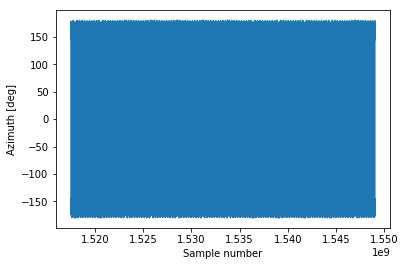

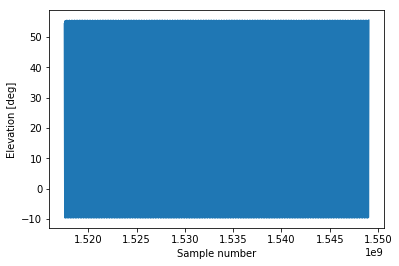

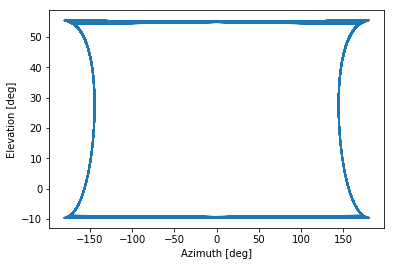

In [9]:
plt.figure(1)
plt.plot(ctime, az)
plt.xlabel('Sample number')
plt.ylabel('Azimuth [deg]')

plt.figure(2)
plt.plot(ctime, el)
plt.xlabel('Sample number')
plt.ylabel('Elevation [deg]')

plt.figure(3)
plt.plot(az, el)
plt.xlabel('Azimuth [deg]')
plt.ylabel('Elevation [deg]')
